#  Week 3: Data Acquisition and Preprocessing

## COVID-19 Group 2

### Aim of this notebook is to work on data gathering and pre-processing

### EDA and Preprocessing Steps:

1. Identification of variables and data types
2. Analyzing the basic metrics
3. Non-Graphical Univariate Analysis
4. Graphical Univariate Analysis
5. Bivariate Analysis
6. Variable transformations
7. Missing value treatment
8. Outlier treatment
9. Correlation Analysis
10. Dimensionality Reduction


We have used a dataset which contains daily time-series data related to COVID-19 for 50+ countries around the world. Source of the data is : https://github.com/GoogleCloudPlatform/covid-19-open-data.
    

### Importing required libraries
We have taken these imports from one of the Lab tutorials.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta,date
import plotly.express as px 
import json, requests
from io import StringIO
import re
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Loading  Dataset at Aggregation level of Countries

In [2]:
# Load CSV data directly from the URL with pandas
data = pd.read_csv(
    "gcp_covid19_countrylevel.csv",
      usecols=["key", "date", "country_name","new_confirmed", "new_deceased", "new_recovered","new_tested", "total_confirmed", "total_deceased","total_recovered", "total_tested", "new_hospitalized","total_hospitalized", "current_hospitalized", "new_intensive_care","total_intensive_care", "current_intensive_care", "new_ventilator","total_ventilator", "current_ventilator", "public_information_campaigns","testing_policy", "contact_tracing", "emergency_investment_in_healthcare","investment_in_vaccines","stringency_index", "relative_humidity", "average_temperature"],
      parse_dates=["date"]
    )

data

,key,date,country_name,new_confirmed,new_deceased,new_recovered,new_tested,total_confirmed,total_deceased,total_recovered,...,total_ventilator,current_ventilator,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index,average_temperature,relative_humidity
0,AD,2020-01-01,Andorra,0.0,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,6.201389,74.345734
1,AD,2020-01-02,Andorra,0.0,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,5.340278,75.648204
2,AD,2020-01-03,Andorra,0.0,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,6.638889,73.984924
3,AD,2020-01-04,Andorra,0.0,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,7.375000,75.926650
4,AD,2020-01-05,Andorra,0.0,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,5.833333,66.599954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79776,ZW,2020-11-14,Zimbabwe,21.0,0.0,NaN,960.0,8786.0,257.0,NaN,...,NaN,NaN,2.0,1.0,1.0,0.0,0.0,67.59,NaN,NaN
79777,ZW,2020-11-15,Zimbabwe,0.0,0.0,NaN,NaN,8786.0,257.0,NaN,...,NaN,NaN,2.0,1.0,1.0,0.0,0.0,67.59,NaN,NaN
79778,ZW,2020-11-16,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,1.0,1.0,0.0,0.0,67.59,NaN,NaN
79779,ZW,2020-11-17,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Identification of  Data Types

In [3]:
data.dtypes

key                                           object
date                                  datetime64[ns]
country_name                                  object
new_confirmed                                float64
new_deceased                                 float64
new_recovered                                float64
new_tested                                   float64
total_confirmed                              float64
total_deceased                               float64
total_recovered                              float64
total_tested                                 float64
new_hospitalized                             float64
total_hospitalized                           float64
current_hospitalized                         float64
new_intensive_care                           float64
total_intensive_care                         float64
current_intensive_care                       float64
new_ventilator                               float64
total_ventilator                             f

### 2. Analyzing the basic metrics

In [4]:
data.describe()

,new_confirmed,new_deceased,new_recovered,new_tested,total_confirmed,total_deceased,total_recovered,total_tested,new_hospitalized,total_hospitalized,...,total_ventilator,current_ventilator,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index,average_temperature,relative_humidity
count,74426.000000,74423.000000,3896.000000,2.242600e+04,7.442800e+04,74424.000000,3.738000e+03,2.265700e+04,1940.000000,1932.000000,...,0.0,531.000000,58190.000000,57712.000000,57733.000000,5.606700e+04,5.638900e+04,58136.000000,72829.000000,71903.000000
mean,735.342313,17.726523,6511.182752,2.782320e+04,6.023429e+04,2032.468182,6.093145e+05,2.310434e+06,416.677835,47476.280538,...,NaN,460.527307,1.625864,1.434329,1.202328,1.134387e+07,5.424823e+05,48.772257,20.808563,68.108907
std,4738.013513,106.291028,19895.917221,1.133078e+05,4.254442e+05,12076.768352,2.120185e+06,1.045248e+07,636.800388,62460.158705,...,NaN,700.668905,0.727982,0.988148,0.827450,1.174215e+09,4.053173e+07,30.280819,10.814021,17.721136
min,-8261.000000,-443.000000,-12522.000000,-3.743000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-40.000000,0.000000,...,NaN,7.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-71.666667,6.064769
25%,0.000000,0.000000,2.000000,9.510000e+02,0.000000e+00,0.000000,3.800000e+02,5.160700e+04,8.000000,3142.000000,...,NaN,40.000000,2.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,22.220000,15.805556,59.992172
50%,1.000000,0.000000,134.000000,3.563000e+03,3.540000e+02,7.000000,1.713350e+04,2.478380e+05,93.000000,12811.000000,...,NaN,137.000000,2.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,53.700000,24.638889,72.876006
75%,94.000000,1.000000,1439.250000,1.383275e+04,7.920000e+03,142.000000,1.203745e+05,1.057522e+06,720.250000,93401.750000,...,NaN,631.000000,2.000000,2.000000,2.000000,0.000000e+00,0.000000e+00,74.540000,27.805556,80.511532
max,184813.000000,4928.000000,140880.000000,1.531394e+06,1.103706e+07,246214.000000,1.697548e+07,1.660391e+08,5913.000000,224089.000000,...,NaN,3301.000000,2.000000,3.000000,2.000000,2.424000e+11,7.863850e+09,100.000000,42.333333,99.670065


### 3 Non-Graphical Univariate Analysis:

In [5]:
### get the count of unique values 

#new_confirmed = data['new_confirmed'].unique()
#new_confirmed

In [6]:
## Filter country based on total_confirmed cases

#data[(data['country_name'] == "Germany") & (data['total_deceased'] >= 5000) & (data['total_confirmed'] >= 5000)]


In [7]:
## Showing number of Missing Records

# Total Records : 79781 

# axis = 1 : Apply operation on columns instead of rows
                
data.apply(lambda x: sum(x.isnull()),axis=0)





key                                     323
date                                      0
country_name                              0
new_confirmed                          5355
new_deceased                           5358
new_recovered                         75885
new_tested                            57355
total_confirmed                        5353
total_deceased                         5357
total_recovered                       76043
total_tested                          57124
new_hospitalized                      77841
total_hospitalized                    77849
current_hospitalized                  78301
new_intensive_care                    78795
total_intensive_care                  78777
current_intensive_care                78197
new_ventilator                        79781
total_ventilator                      79781
current_ventilator                    79250
public_information_campaigns          21591
testing_policy                        22069
contact_tracing                 

In [8]:
# Find percentage of missing values:

percent_missing_col = data.isnull().sum() * 100 / len(data)
percent_missing_col

key                                     0.404858
date                                    0.000000
country_name                            0.000000
new_confirmed                           6.712124
new_deceased                            6.715885
new_recovered                          95.116632
new_tested                             71.890550
total_confirmed                         6.709618
total_deceased                          6.714631
total_recovered                        95.314674
total_tested                           71.601008
new_hospitalized                       97.568343
total_hospitalized                     97.578371
current_hospitalized                   98.144922
new_intensive_care                     98.764117
total_intensive_care                   98.741555
current_intensive_care                 98.014565
new_ventilator                        100.000000
total_ventilator                      100.000000
current_ventilator                     99.334428
public_information_c

In [9]:
# show columns, which have more than 70% values missing

cols = data.columns[data.isnull().mean()>0.7]
cols

Index(['new_recovered', 'new_tested', 'total_recovered', 'total_tested',
       'new_hospitalized', 'total_hospitalized', 'current_hospitalized',
       'new_intensive_care', 'total_intensive_care', 'current_intensive_care',
       'new_ventilator', 'total_ventilator', 'current_ventilator'],
      dtype='object')

In [10]:
# Drop columns, which have more than 70% values missing
# inplace=True : means permanently apply the change

data.drop(cols, axis=1,  inplace=True)

# Replace NAN and Missing Values with 0
data.fillna(pd.Series(0, index=data.select_dtypes(exclude='category').columns),inplace=True)


In [11]:
# Find percentage of missing values:

#percent_missing_col = data.isnull().sum() * 100 / len(data)
#percent_missing_col
data

,key,date,country_name,new_confirmed,new_deceased,total_confirmed,total_deceased,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index,average_temperature,relative_humidity
0,AD,2020-01-01,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.201389,74.345734
1,AD,2020-01-02,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5.340278,75.648204
2,AD,2020-01-03,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.638889,73.984924
3,AD,2020-01-04,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.375000,75.926650
4,AD,2020-01-05,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5.833333,66.599954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79776,ZW,2020-11-14,Zimbabwe,21.0,0.0,8786.0,257.0,2.0,1.0,1.0,0.0,0.0,67.59,0.000000,0.000000
79777,ZW,2020-11-15,Zimbabwe,0.0,0.0,8786.0,257.0,2.0,1.0,1.0,0.0,0.0,67.59,0.000000,0.000000
79778,ZW,2020-11-16,Zimbabwe,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,67.59,0.000000,0.000000
79779,ZW,2020-11-17,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000


## 4. Graphical Univariate Analysis



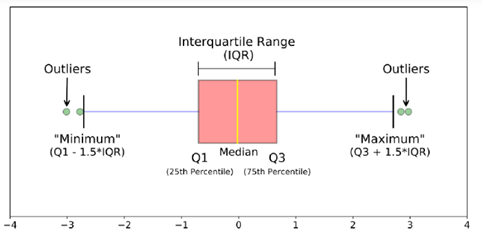

In [12]:
Image(filename = "outlier.png", width = 600, height = 300)

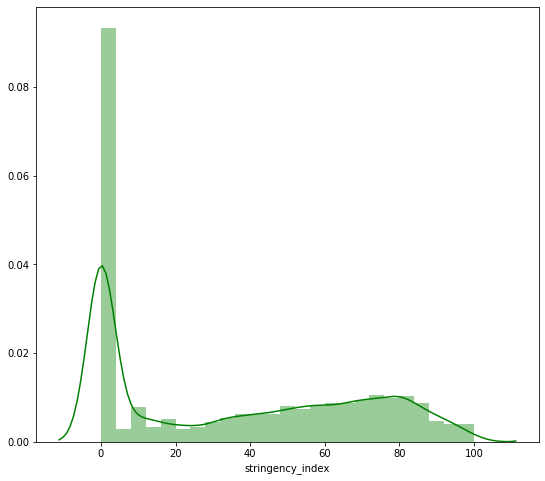

In [13]:
# Finding Outliers

plt.figure(figsize=(9,8))
#sns.distplot(data['new_confirmed'], color='g', bins=100, hist_kws={'alpha':0.4});
#sns.distplot(data['new_deceased'], color='g', bins=100, hist_kws={'alpha':0.4});
#sns.distplot(data['total_confirmed'], color='g', bins=100, hist_kws={'alpha':0.4});
#sns.distplot(data['public_information_campaigns'], color='g', bins=100, hist_kws={'alpha':0.4});
#sns.distplot(data['testing_policy'], color='g', bins=25, hist_kws={'alpha':0.4});
#sns.distplot(data['contact_tracing'], color='g', bins=100, hist_kws={'alpha':0.4});
##sns.distplot(data['emergency_investment_in_healthcare'], color='g', bins=100, hist_kws={'alpha':0.4});
#sns.distplot(data['investment_in_vaccines'], color='g', bins=100, hist_kws={'alpha':0.4});
sns.distplot(data['stringency_index'], color='g', bins=25, hist_kws={'alpha':0.4});
#sns.distplot(data['average_temperature'], color='g', bins=100, hist_kws={'alpha':0.4});
#sns.distplot(data['relative_humidity'], color='g', bins=100, hist_kws={'alpha':0.4});


AxesSubplot(0.125,0.125;0.775x0.755)


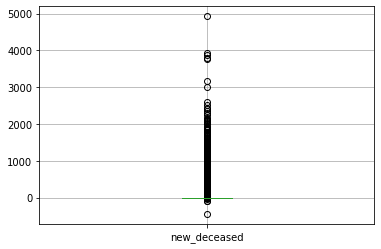

In [14]:
# Finding Outliers via box Plot

#print(data.boxplot(column='new_confirmed')) 
print(data.boxplot(column='new_deceased'))
#print(data.boxplot(column='total_confirmed'))
#print(data.boxplot(column='total_deceased'))
#print(data.boxplot(column='public_information_campaigns'))
#print(data.boxplot(column='testing_policy'))
#print(data.boxplot(column='contact_tracing'))
#print(data.boxplot(column='emergency_investment_in_healthcare'))
#print(data.boxplot(column='investment_in_vaccines'))
#print(data.boxplot(column='stringency_index'))
#print(data.boxplot(column='average_temperature'))
#print(data.boxplot(column='relative_humidity'))

In [15]:
#data.boxplot(column='total_confirmed', by = 'average_temperature')

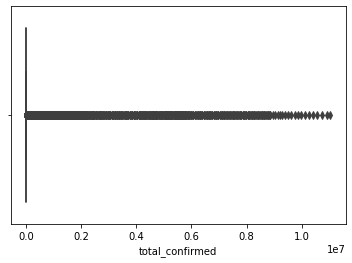

In [16]:
#sns.boxplot(x=data['new_confirmed'])
#sns.boxplot(x=data['new_deceased'])
sns.boxplot(x=data['total_confirmed'])
#sns.boxplot(x=data['total_deceased'])
#sns.boxplot(x=data['public_information_campaigns'])
#sns.boxplot(x=data['testing_policy'])
#sns.boxplot(x=data['contact_tracing'])
#sns.boxplot(x=data['emergency_investment_in_healthcare'])
#sns.boxplot(x=data['investment_in_vaccines'])
#sns.boxplot(x=data['stringency_index'])
#sns.boxplot(x=data['average_temperature'])
#sns.boxplot(x=data['relative_humidity'])

#sns.boxplot(x="total_confirmed", y="average_temperature", hue="relative_humidity", data=data, palette="Set1")



In [17]:
# To Extract all integer Columns
data_number = data.select_dtypes(include=['float','int64'])
data_number

,new_confirmed,new_deceased,total_confirmed,total_deceased,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index,average_temperature,relative_humidity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.201389,74.345734
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5.340278,75.648204
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.638889,73.984924
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.375000,75.926650
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5.833333,66.599954
...,...,...,...,...,...,...,...,...,...,...,...,...
79776,21.0,0.0,8786.0,257.0,2.0,1.0,1.0,0.0,0.0,67.59,0.000000,0.000000
79777,0.0,0.0,8786.0,257.0,2.0,1.0,1.0,0.0,0.0,67.59,0.000000,0.000000
79778,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,67.59,0.000000,0.000000
79779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFBE240508>,
      dtype=object)

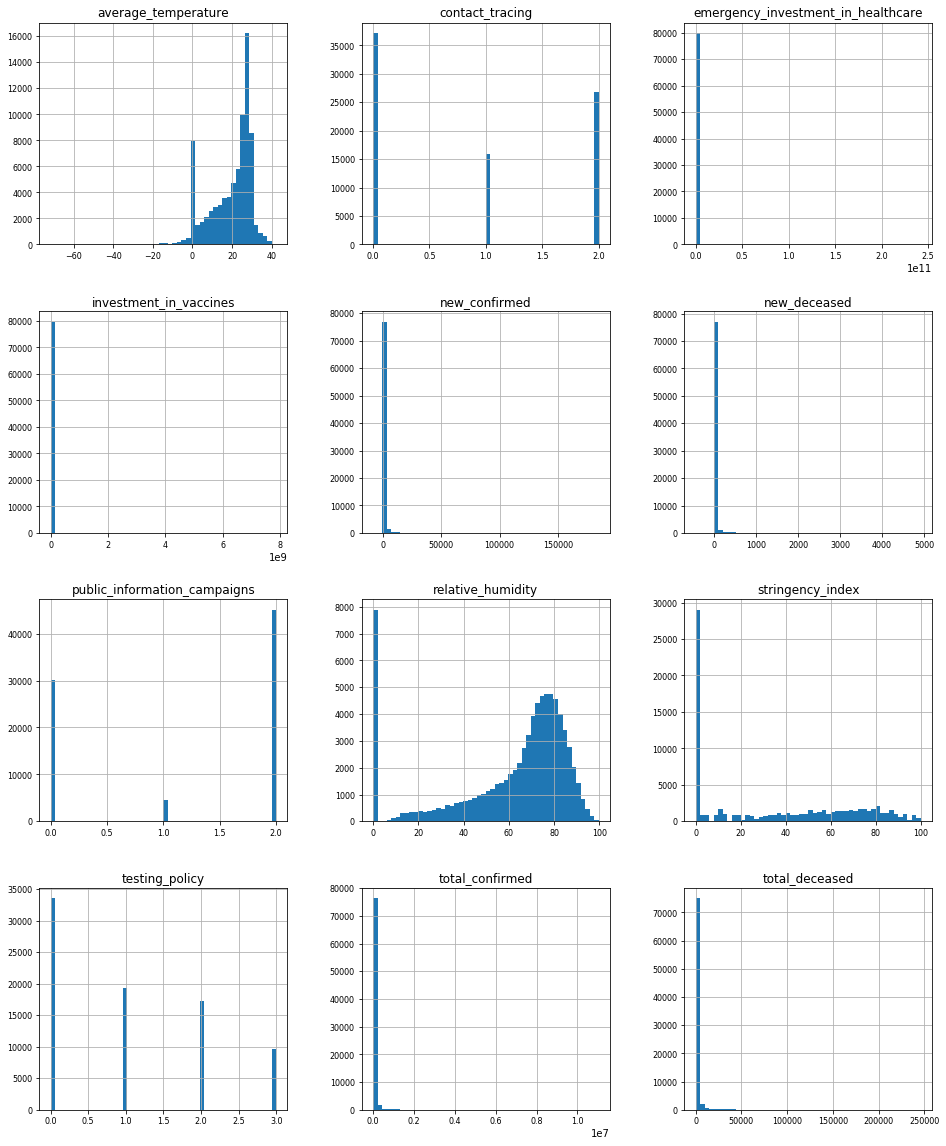

In [18]:
data_number.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

# Correlation

In [19]:
# Finding Strongly correlated values with total_confirmed
df_num_correction = data_number.corr()['total_confirmed'][:-1]
golden_feature_list = df_num_correction[abs(df_num_correction) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with total_confirmed :\n{}".format(len(golden_feature_list),golden_feature_list))

There are 4 strongly correlated values with total_confirmed :
total_confirmed    1.000000
total_deceased     0.916149
new_confirmed      0.846685
new_deceased       0.603553
Name: total_confirmed, dtype: float64


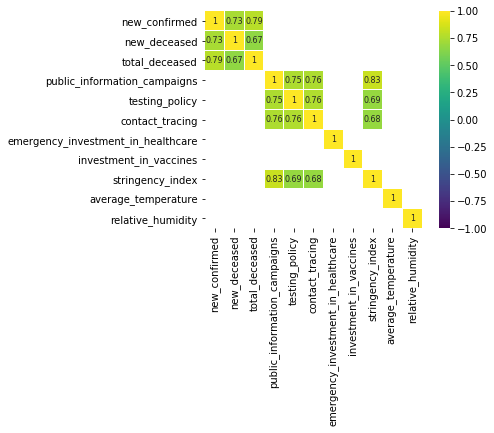

In [20]:
# Feature To Feature Relationships
# These relationships help us to reconfigure the dataset by removing columns that mean the same thing.

# Example : If we would have more testing policies, we can relay it to contact tracing

corr = data_number.drop('total_confirmed',axis=1).corr()
sns.heatmap(corr[(corr>0.5) | (corr <= -0.4)],cmap='viridis',vmax=1.0,vmin=-1.0,linewidth=0.1,annot=True,annot_kws={"size":8},square=True)

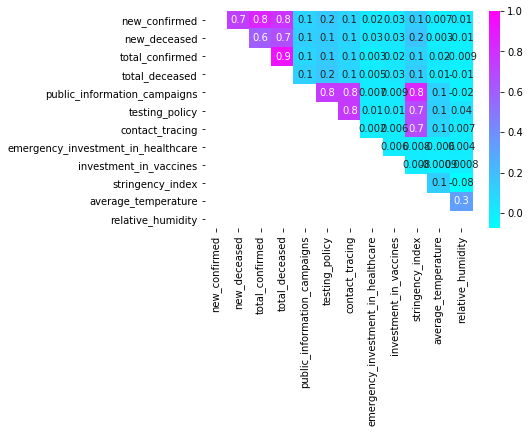

In [21]:
mask = np.tril(data_number.corr())
sns.heatmap(data_number.corr(), fmt='.1g', annot = True, cmap= 'cool', mask=mask)

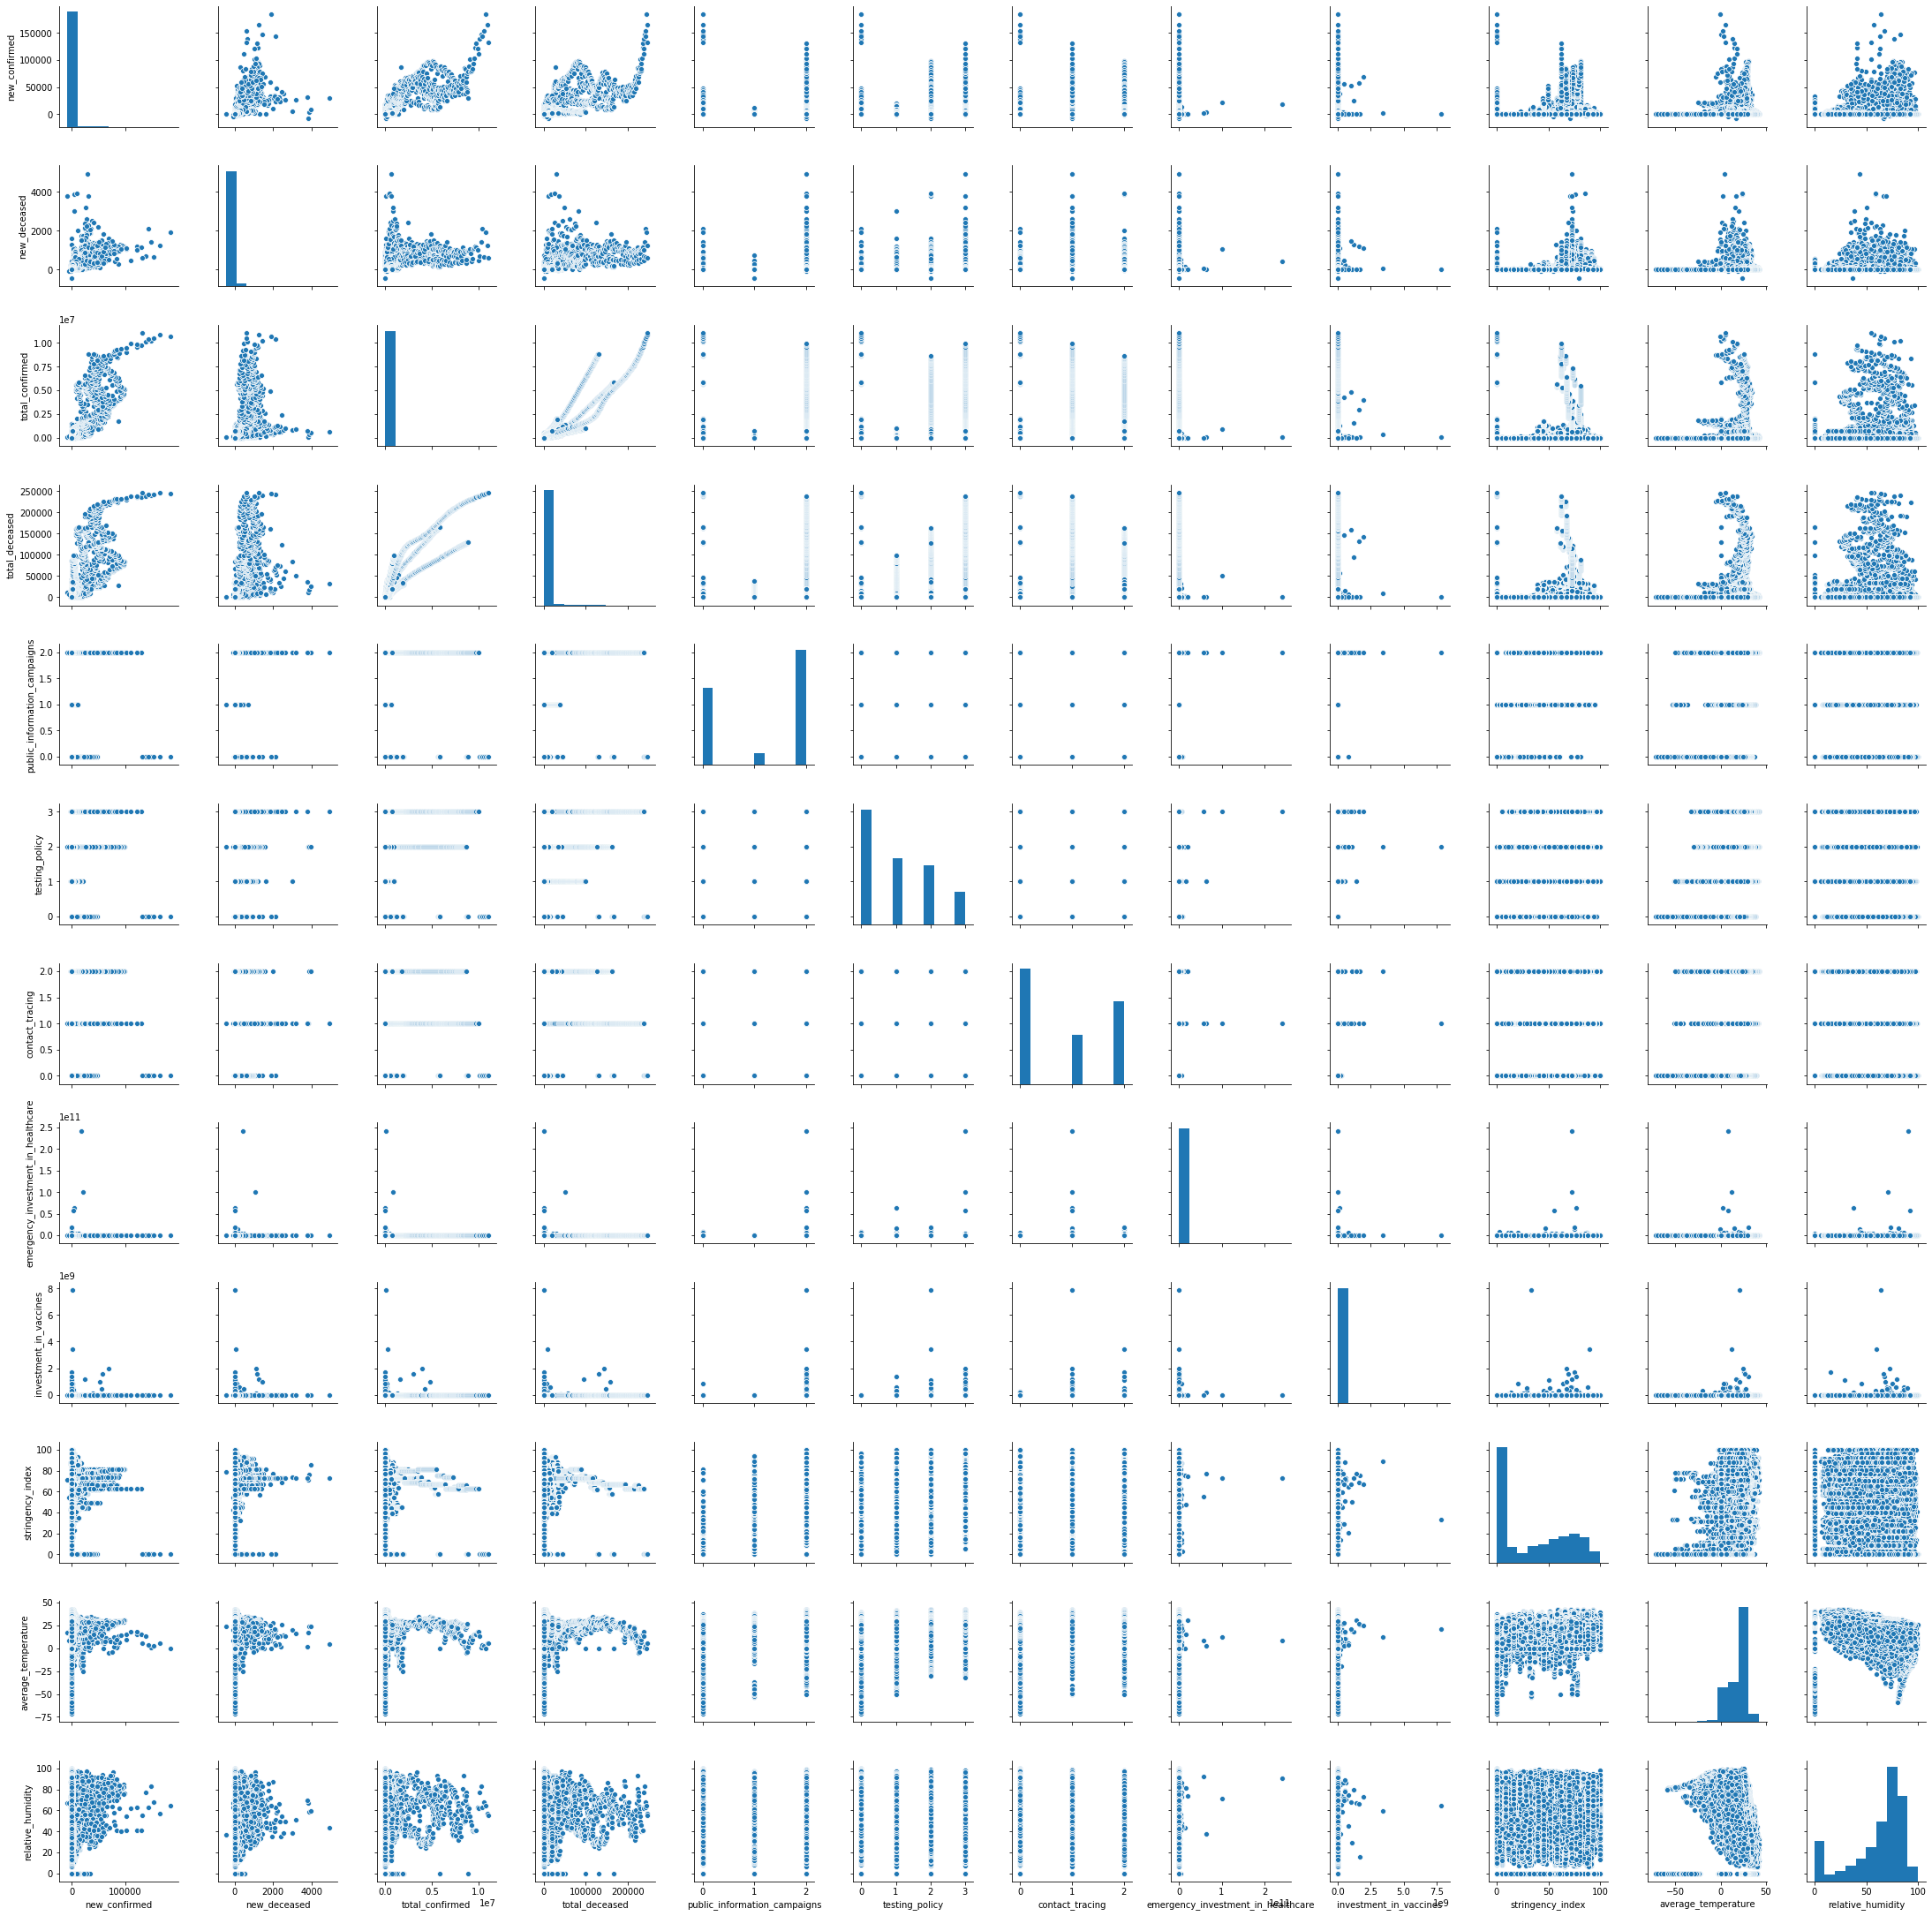

In [22]:
sns.pairplot(data_number)

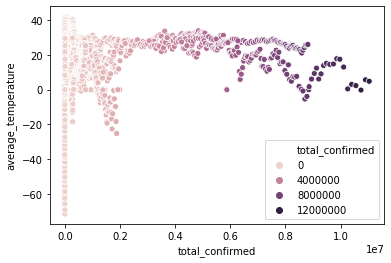

In [23]:
# Listing Total_confirmed based on average temperature

sns.scatterplot(x='total_confirmed', y='average_temperature', data=data_number, hue='total_confirmed')

new_confirmed                             AxesSubplot(0.125,0.71587;0.168478x0.16413)
new_deceased                           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
total_confirmed                        AxesSubplot(0.529348,0.71587;0.168478x0.16413)
total_deceased                         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
public_information_campaigns             AxesSubplot(0.125,0.518913;0.168478x0.16413)
testing_policy                        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
contact_tracing                       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
emergency_investment_in_healthcare    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
investment_in_vaccines                   AxesSubplot(0.125,0.321957;0.168478x0.16413)
stringency_index                      AxesSubplot(0.327174,0.321957;0.168478x0.16413)
average_temperature                   AxesSubplot(0.529348,0.321957;0.168478x0.16413)
relative_humidity                     AxesSubplot(0.73

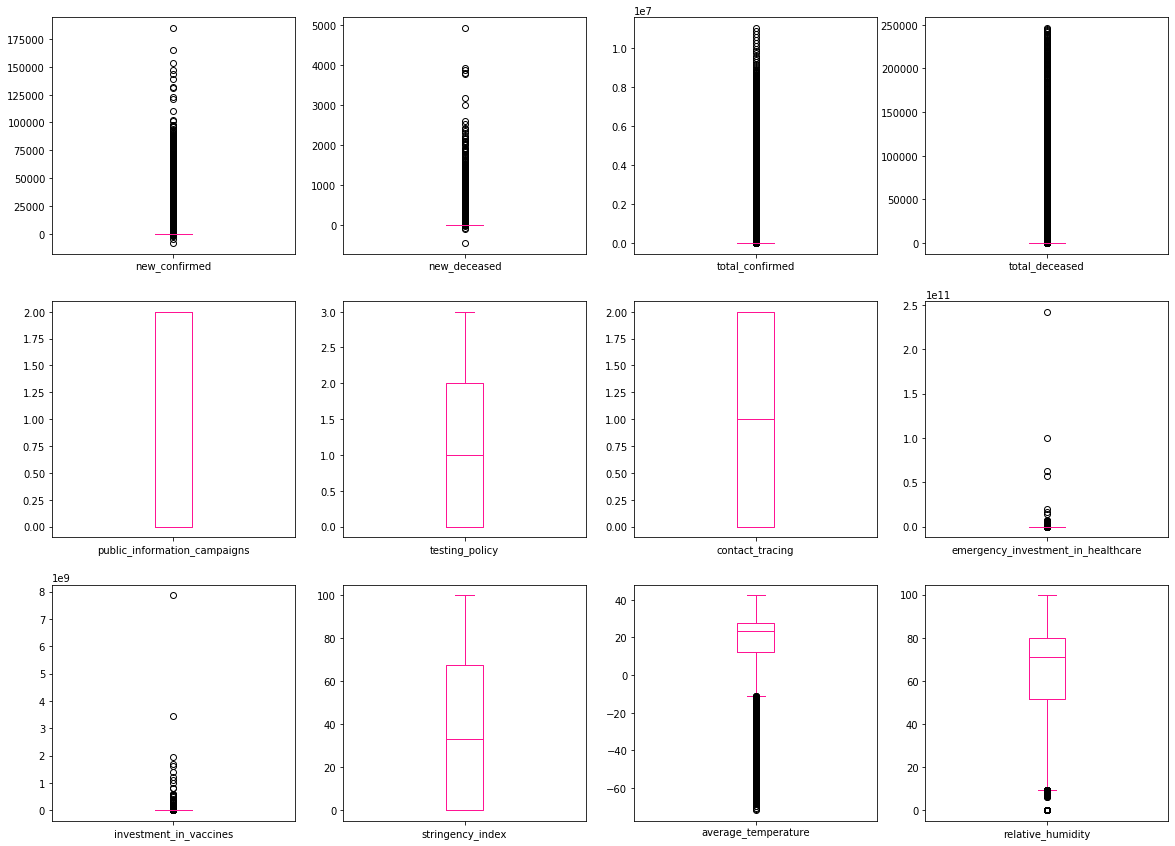

In [24]:
data_number.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20, 20), color='deeppink')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFD5538C08>,
      dtype=object)

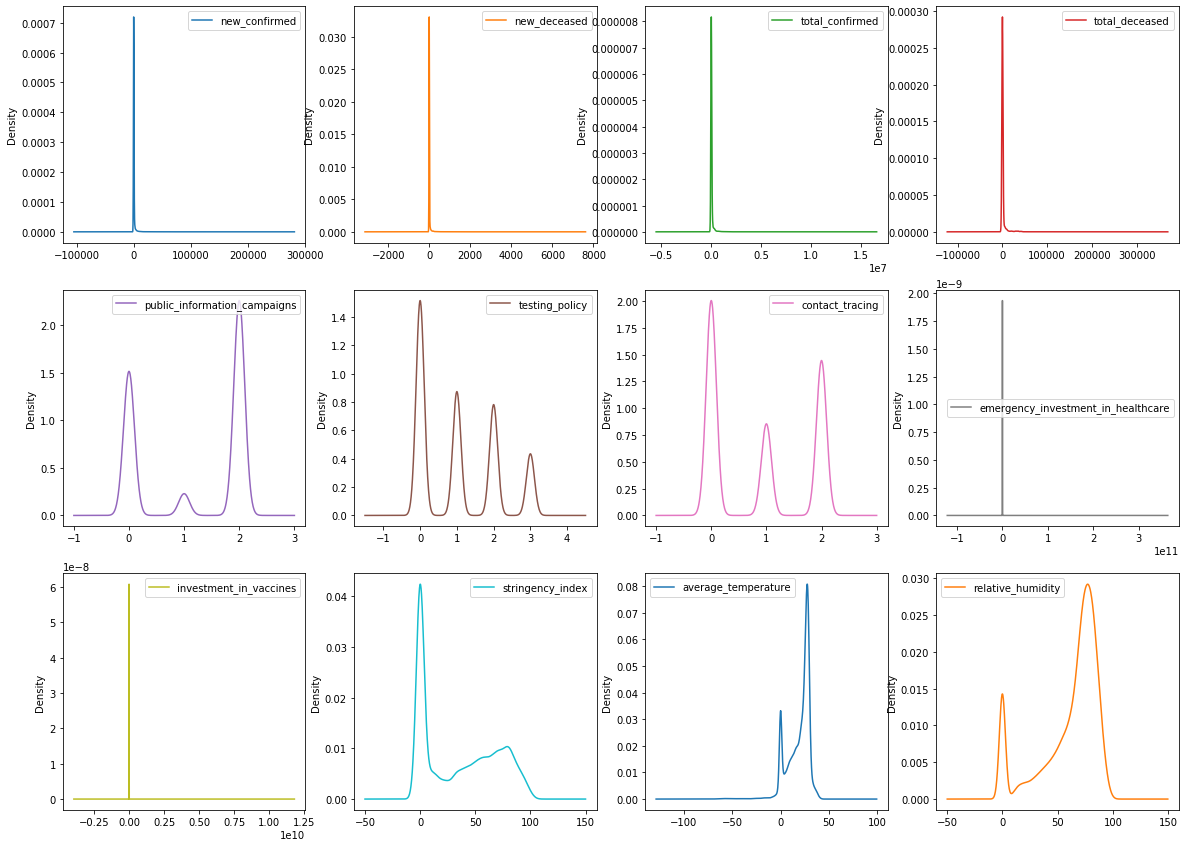

In [25]:
data_number.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(20, 20))


In [26]:
# Identifying Outliers with Interquartile Range (IQR)

Q1 = data_number.quantile(0.25)
Q3 = data_number.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

new_confirmed                           73.000000
new_deceased                             1.000000
total_confirmed                       6263.000000
total_deceased                         114.000000
public_information_campaigns             2.000000
testing_policy                           2.000000
contact_tracing                          2.000000
emergency_investment_in_healthcare       0.000000
investment_in_vaccines                   0.000000
stringency_index                        67.590000
average_temperature                     15.528395
relative_humidity                       28.079683
dtype: float64


In [27]:
# Showing where exactly are the outliers in each column by Boolean value "True"

print((data_number < (Q1 - 1.5 * IQR)) | (data_number > (Q3 + 1.5 * IQR)))


       new_confirmed  new_deceased  total_confirmed  total_deceased  \
0              False         False            False           False   
1              False         False            False           False   
2              False         False            False           False   
3              False         False            False           False   
4              False         False            False           False   
...              ...           ...              ...             ...   
79776          False         False            False           False   
79777          False         False            False           False   
79778          False         False            False           False   
79779          False         False            False           False   
79780          False         False            False           False   

       public_information_campaigns  testing_policy  contact_tracing  \
0                             False           False            False   
1  

In [28]:
# Skewness for identification of outliers
# the skewness value should be between -1 and +1, any value 
# Any major deviation from this range indicates the presence of extreme values.

print(data_number['total_confirmed'].skew())
data_number['total_confirmed'].describe()

15.242462069738036


count    7.978100e+04
mean     5.619280e+04
std      4.111996e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.110000e+02
75%      6.263000e+03
max      1.103706e+07
Name: total_confirmed, dtype: float64

In [29]:
# DATA DISCRETIZATION / SMOOTHING - Convert CONTINUOUS DATA TO CATEGORICAL DATA

# Feature Encoding
# CREATE  NEW  VARIABLE - For  eg  date can be divided into 3 separate variables(D/M/Y))
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day
data

bins = [0, 1000, 5000, 10000]
labels = ["Not Critical","Worrying","Critical"]
data['range'] = pd.cut(data['total_confirmed'], bins=bins, labels=labels)


data

,key,date,country_name,new_confirmed,new_deceased,total_confirmed,total_deceased,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index,average_temperature,relative_humidity,year,month,day,range
0,AD,2020-01-01,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.201389,74.345734,2020,1,1,NaN
1,AD,2020-01-02,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5.340278,75.648204,2020,1,2,NaN
2,AD,2020-01-03,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.638889,73.984924,2020,1,3,NaN
3,AD,2020-01-04,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.375000,75.926650,2020,1,4,NaN
4,AD,2020-01-05,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5.833333,66.599954,2020,1,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79776,ZW,2020-11-14,Zimbabwe,21.0,0.0,8786.0,257.0,2.0,1.0,1.0,0.0,0.0,67.59,0.000000,0.000000,2020,11,14,Critical
79777,ZW,2020-11-15,Zimbabwe,0.0,0.0,8786.0,257.0,2.0,1.0,1.0,0.0,0.0,67.59,0.000000,0.000000,2020,11,15,Critical
79778,ZW,2020-11-16,Zimbabwe,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,67.59,0.000000,0.000000,2020,11,16,NaN
79779,ZW,2020-11-17,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,2020,11,17,NaN


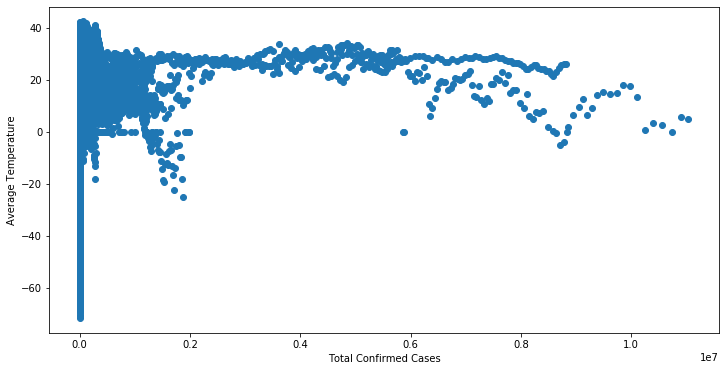

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data_number['total_confirmed'], data_number['average_temperature'])
ax.set_xlabel('Total Confirmed Cases')
ax.set_ylabel('Average Temperature')
plt.show()

## Treating Outliers

In [31]:
# Flooring and Capping

#print(data_number['total_confirmed'].quantile(0.10))
#print(data_number['total_confirmed'].quantile(0.90))



print(data_number['average_temperature'].quantile(0.10))
print(data_number['average_temperature'].quantile(0.90))

#print(data_number['relative_humidity'].quantile(0.10))
#print(data_number['relative_humidity'].quantile(0.90))




0.0
29.25


In [32]:
# Checking Skewness:-1 and +1

data_number["total_confirmed"] = np.where(data_number["total_confirmed"] <0.0, 0.0,data_number['total_confirmed'])
data_number["total_confirmed"] = np.where(data_number["total_confirmed"] >64811.0, 64811.0,data_number['total_confirmed'])
print(data_number['total_confirmed'].skew())

#Output: 1.9317061343254394

data_number["average_temperature"] = np.where(data_number["average_temperature"] <0.0, 0.0,data_number['average_temperature'])
data_number["average_temperature"] = np.where(data_number["average_temperature"] >29.25, 29.25,data_number['average_temperature'])
print(data_number['average_temperature'].skew())


#Output: -0.8145711992637101


data_number["relative_humidity"] = np.where(data_number["relative_humidity"] <9.469653, 9.469653,data_number['relative_humidity'])
data_number["relative_humidity"] = np.where(data_number["relative_humidity"] >85.585127, 85.585127,data_number['relative_humidity'])
print(data_number['relative_humidity'].skew())

#Output : -1.1309784387012194


1.9317061343254394
-0.8145711992637101
-1.1309784387012194


In [33]:
# Trimming

#index = data_number[(data_number['Age_Column'] >= 100)|(data_number['Age_Column'] <= 18)].index
#data_number.drop(index, inplace=True)
#data_number['Age_Column'].describe()

In [34]:
# IQR Range

# take only values which is in the IQR range
output = data_number[~((data_number < (Q1 - 1.5 * IQR)) |(data_number > (Q3 + 1.5 * IQR))).any(axis=1)]
print(output.shape)

(58553, 12)


In [35]:
# Replacing outliers with median of that column

median = float(data_number['average_temperature'].median())
data_number["average_temperature"] = np.where(data_number["average_temperature"] > median, median, data_number['average_temperature'])
#data_number.min()
#data_number['new_confirmed'].describe()
data_number['average_temperature'].describe()

count    79781.000000
mean        17.271683
std          8.537785
min          0.000000
25%         12.033333
50%         23.468254
75%         23.468254
max         23.468254
Name: average_temperature, dtype: float64

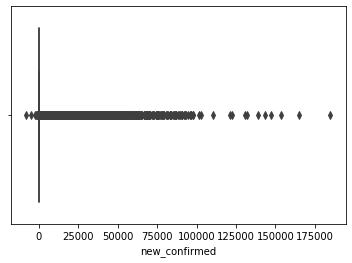

In [36]:
sns.boxplot(x=data['new_confirmed'])

## Inferences

In [37]:
# Create Data Frame fromt the data set 
dataFrame = pd.DataFrame(data_number, columns=[ 'date', 'country_name','total_confirmed','average_temperature'])

                                        
# FORMATTING CONSISTENCY CHECK (for eg  all  dates should have the SAME format)  Also Check if datatypes and data values are appropriate for future use.  
data_main = dataFrame['date'] = pd.to_datetime(dataFrame['date'], infer_datetime_format=True)
                                        
# date          country_name        region  total_confirmed    average_temperature

Nov-Dec     Germany,France       Europe      Critical            5

June-july   Germany,France       Europe       Worrying          15




SyntaxError: invalid syntax (<ipython-input-37-ba1dd480db4b>, line 10)